In [1]:
from thermotools.plot import *
import os, glob
import numpy as np
from matplotlib.ticker import MultipleLocator

from thermotools import phase
from thermotools import water
from thermotools import moles
from thermotools import get_data, empty_dir

tmin = 0.5
dt   = 0.1

elem_table = moles.read_elements()

datdir = os.path.join(get_data(), "sat", "dat")
empty_dir(datdir)

empty_dir(os.path.join(get_data(), "sat", "plt"))

In [2]:
def write_csv(gas,ts,ps):
    X = np.array([ts,ps]).T 
    head = "T [K] , P_sat [Pa]"
    fpath = datdir+"/%s_sat.csv"%gas 

    np.savetxt(fpath, X, fmt="%.9e", delimiter=',', header=head)

def write_tripcrit(gas, t_trip, t_crit):

    X = [t_trip]
    head = "T_trip [K]"
    fpath = datdir+"/%s_trip.csv"%gas 
    np.savetxt(fpath, X, fmt="%.9e", delimiter=',', header=head)

    X = [t_crit]
    head = "T_crit [K]"
    fpath = datdir+"/%s_crit.csv"%gas 
    np.savetxt(fpath, X, fmt="%.9e", delimiter=',', header=head)

In [3]:
# Main gases
for gas in phase.gases.keys():
    print(gas)
    mmw = moles.mmw_from_formula(gas, elem_table)
    gdict = phase.gases[gas]

    fname = os.path.join(get_data(),"lv","dat")+"/%s.csv"%gas
    if os.path.exists(fname):
        t_arr = np.arange(tmin, gdict["T_crit"], dt)
        t_arr = np.concatenate((t_arr, [gdict["T_crit"]]))
        p_arr = [phase.cc_psat(t, gas, mmw) for t in t_arr]
    else:
        t_arr = [0.0,  5000]
        p_arr = [1e20, 2e20]
        print("    stub")

    write_csv(gas, t_arr, p_arr)
    write_tripcrit(gas, gdict["T_trip"], gdict["T_crit"])

    print("    ok")


NH3
    ok
CO2
    ok
CH4
    ok
H2
    ok
N2
    ok
SO2
    ok
N2O
    stub
    ok
O2
    ok
H2S
    stub
    ok
O3
    stub
    ok
HCN
    ok
SiH4
    stub
    ok


In [4]:
# Water
t_arr = np.arange(tmin, water.T_crit, dt)
t_arr = np.concatenate((t_arr, [water.T_crit]))
arr_p = [water.psat_both(t) for t in t_arr]

write_csv("H2O",t_arr, arr_p)
write_tripcrit("H2O", water.T_trip, water.T_crit)

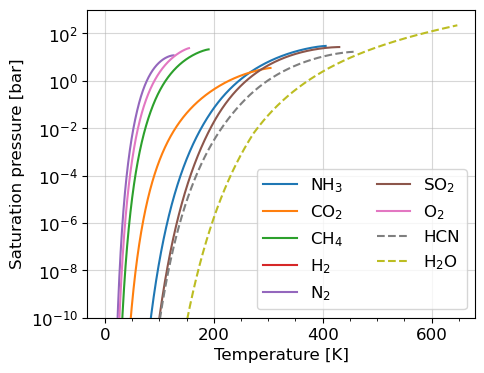

In [5]:
plt.close("all")


fig,ax = plt.subplots(1,1, figsize=(5,4))

files = glob.glob(datdir+"/*_sat.csv")

for i,f in enumerate(files):
    form = moles.formula_from_path(f).split("_")[0]
    data = np.loadtxt(f, delimiter=',').T

    ls='solid'
    if i > 9:
        ls='dashed'
    if i > 18:
        ls='dotted'

    if len(data[0]) < 3:
        continue

    l = ax.plot(data[0], data[1]*1e-5, label=pretty_name(form), ls=ls, zorder=3)[0]

ax.set(xlabel="Temperature [K]", ylabel="Saturation pressure [bar]")
ax.legend(loc='lower right',ncols=2)

ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.grid(zorder=0, alpha=0.5)

ax.set_yscale("log")
ax.set_ylim(bottom=1e-10, top=1e3)

fig.savefig(os.path.join(get_data(),"sat","plt","all.pdf"), bbox_inches='tight')
plt.show()